# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

736

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create the list to Store the API called data
city_name = []
max_temperature = []
humidity = []
cloud = []
wind = []
country = []
date = []
lat = []
lon = []

# Set the initial city number as 0
i =0

# List the base_url for later API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Print the APT Call data
print("Beginning data Retrieval")
print("-----------------------------")
for city in cities:
    complete_url = base_url + "units=" + "Imperial" + "&APPID=" + api_key + "&q=" + city
    response = requests.get(complete_url)
    x = response.json()
    try:
        # Store the API call data into the created list
        city_name.append(x["name"])
        lat.append(x["coord"]["lat"])
        lon.append(x["coord"]["lon"])
        country.append(x["sys"]["country"])
        max_temperature.append(x["main"]["temp_max"]) 
        humidity.append(x["main"]["humidity"])
        cloud.append(x["clouds"]["all"])
        wind.append(x["wind"]["speed"])
        date.append(x["dt"])
        print(f"Processing Record {i} | {city}")
        print(complete_url)
        i = i + 1
        
    # skip the key errors to avoid the calling stop
    except KeyError:
        print(" City Not Found. Skipping...")        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning data Retrieval
-----------------------------
 City Not Found. Skipping...
Processing Record 0 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5095cd90977b97bbe4075c6a1bf272fa&q=yellowknife
Processing Record 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5095cd90977b97bbe4075c6a1bf272fa&q=albany
Processing Record 2 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5095cd90977b97bbe4075c6a1bf272fa&q=upernavik
Processing Record 3 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5095cd90977b97bbe4075c6a1bf272fa&q=cidreira
Processing Record 4 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5095cd90977b97bbe4075c6a1bf272fa&q=avera
Processing Record 5 | camopi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5095cd90977b97bbe4075c6a1bf272fa&q=camopi
Processing Record 6 | koshurnikovo
http://api.openweathermap.org

In [4]:
# Store the API call into dataframe
weather_data = pd.DataFrame({"City":city_name, 
                             "Cloudiness":cloud,
                             "Country":country,
                             "Date":date,
                             "Humidity":humidity,
                             "Lat":lat,
                             "Lng":lon,
                             "Max Temp":max_temperature,
                             "Wind Speed":wind})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Check the dataframe
weather_data.count()

City          649
Cloudiness    649
Country       649
Date          649
Humidity      649
Lat           649
Lng           649
Max Temp      649
Wind Speed    649
dtype: int64

In [6]:
# Display the dataframe
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,40,CA,1547445600,73,62.45,-114.38,-29.21,5.82
1,Albany,20,US,1547445240,75,42.65,-73.75,10.04,5.82
2,Upernavik,20,GL,1547447599,100,72.79,-56.15,-11.39,5.61
3,Cidreira,32,BR,1547447599,97,-30.17,-50.22,74.93,8.19
4,Avera,90,US,1547446500,90,33.19,-82.53,46.04,6.93


In [7]:
# Add one column "readable date" to the dataframe 
weather_data["Date_readable"] = pd.to_datetime(weather_data["Date"],unit='s').dt.date

# Call the date from the readable date
t = weather_data["Date_readable"][1]

# Output File (CSV)
output_data_file = "output/cities.csv"
weather_data.to_csv(output_data_file, sep=',', encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

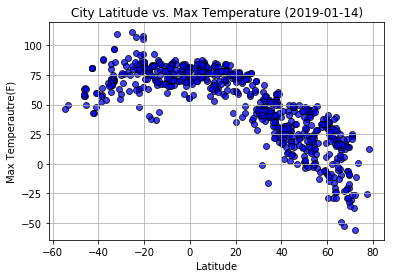

In [8]:
# Define a function for plotting
def scatter_plot(weather_interest):
    return plt.scatter(weather_data["Lat"], weather_interest, linewidths = 1, marker = "o", label = i, facecolor = "blue", edgecolor = "black", alpha = 0.75), plt.xlabel("Latitude"),plt.grid()

# Plot the general fig
scatter_plot(weather_data["Max Temp"])

# Plot other features 
plt.ylabel("Max Temperautre(F)")
plt.title(f"City Latitude vs. Max Temperature ({t})")

# Save the fig
plt.savefig("output/City Latitude VS Max Temperature.png")

# Show plot
plt.show()

In [10]:
#####################################################################################################################################
#
#Figure "City Latitude vs. Max Temperature('the API calling time')" shows that 
#         1) the cities that are closer to equator have higher Max temperature (> 50 F)
#         2) the cities with latitude (20° - 80°) have lower temperature than the ones in (-20° ~ -60°)
#
#####################################################################################################################################

#### Latitude vs. Humidity Plot

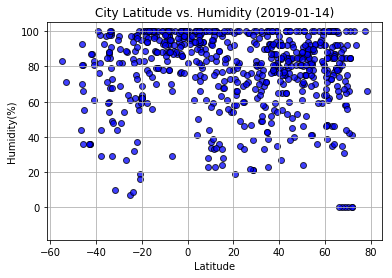

In [11]:
# Plot the fig with general feautres
scatter_plot(weather_data["Humidity"])

# Plot other features 
plt.ylim(top=105) # generally, no humidity is higher that 100%
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({t})")

# Save the fig
plt.savefig("output/City Latitude VS Humidity.png")

# Show plot
plt.show()

In [12]:
##########################################################################################################################
#
#Figure "City Latitude vs. Humidity ('the API calling time')" shows that the cities with latitude (20° ~ 60°)have higher humidity(60%-100%)
#
##########################################################################################################################

#### Latitude vs. Cloudiness Plot

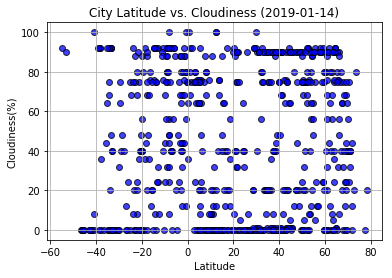

In [13]:
# Plot the fig with general feautres
scatter_plot(weather_data["Cloudiness"])

# Plot other features 
plt.ylim(top=105) # generally, no cloudiness is higher that 100%
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({t})")

# Save the fig
plt.savefig("output/City Latitude VS Cloudiness.png")

# Show plot
plt.show()

In [14]:
################################################################################################################################################
#
#Figure "City Latitude vs. Cloudiness ('the API calling time')" shows that the cloudiness of cities does not significantly vary with location
#
################################################################################################################################################

#### Latitude vs. Wind Speed Plot

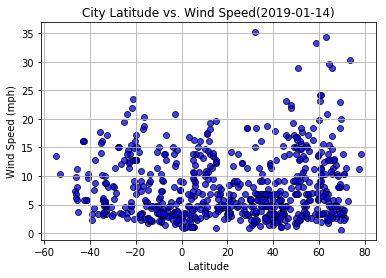

In [15]:
# Plot the fig with general feautres
scatter_plot(weather_data["Wind Speed"])

# Plot other features 
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed({t})")

# Save the fig
plt.savefig("output/City Latitude VS Wind Speed.png")

# Show plot
plt.show()

In [16]:
##########################################################################################################################
#
#Figure "City Latitude vs. Wind Speed ('the API calling time')" shows that 
#      1) the windspeed of the cities are generally lower than 25 mph
#      2) cities withe latitude higher than 60° are more higher higher wind speed (>25 mph)
#
##########################################################################################################################